In [47]:
import overpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
api = overpy.Overpass()

## Objectives 
1. Get Points of Interest from open data sources like open street map (OSM).  
        whats a POI in OSM: https://wiki.openstreetmap.org/wiki/Points_of_interest
        What POIs make up a commercial center?
        Query for these POIs
        
2. Understand how spatial location data works
        https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf
        
3. Understand spatial vector data types and how to manipulate it using your language of choice.  
4. Understand necessary GIS concepts like projections, spatial clustering, etc.  
5. Figure out a way of clustering these points into commercial centres/markets.  
6. Visualize the regions of interest  




## What is a commercial center?
Restaurants  
Bar  
Pub
Cafes
ATM/BANK  



Corporate Commercial Offices


Trees 
traffic lights
night time lighting




In [53]:
# rel[name=Pittsburgh]
#    [admin_level=8]
#    [boundary=administrative];
# out geom;
# <bounds minlat="40.3615200" minlon="-80.0955170" maxlat="40.5012021" maxlon="-79.8657280"/>
querystr = """[timeout:25][bbox:40.3615200,-80.0955170,40.5012021,-79.8657280];
( node["amenity"="restaurant"];
  way["amenity"="restaurant"];
  relation["amenity"="restaurant"]; 
  
  node["amenity"="bar"];
  way["amenity"="bar"];
  relation["amenity"="bar"];
  
  node["amenity"="pub"];
  way["amenity"="pub"];
  relation["amenity"="pub"];
  
);
out center;"""

In [54]:
result = api.query(querystr)


In [63]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_areas',
 '_class_collection_map',
 '_nodes',
 '_relations',
 '_ways',
 'api',
 'append',
 'area_ids',
 'areas',
 'expand',
 'from_json',
 'from_xml',
 'get_area',
 'get_area_ids',
 'get_areas',
 'get_elements',
 'get_ids',
 'get_node',
 'get_node_ids',
 'get_nodes',
 'get_relation',
 'get_relation_ids',
 'get_relations',
 'get_way',
 'get_way_ids',
 'get_ways',
 'node_ids',
 'nodes',
 'relation_ids',
 'relations',
 'way_ids',
 'ways']

In [55]:
result.get_node(4289337993)

<overpy.Node id=4289337993 lat=40.5011068 lon=-80.0672439>

In [56]:
pos_arr = np.asarray([[float(node.lat),float(node.lon)] for node in result.nodes])

In [61]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(pos_arr)

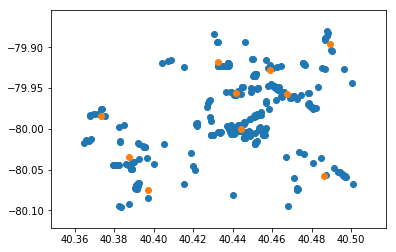

In [68]:
# f = plt.figure(figsize=(12,5))
# plt.xlim(-80.0955170,-79.8657280)
# plt.ylim(40.3615200,40.5012021)
plt.scatter(pos_arr[:,0],pos_arr[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
# plt.axis('equal')